In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
pd.options.display.max_rows = 100
pd.options.mode.copy_on_write = True

In [2]:
df = pd.read_csv('fr.openfoodfacts.org.products.csv',sep = '\t',low_memory=False)
df.describe()


,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutrition_grade_uk,energy_100g,energy-from-fat_100g,fat_100g,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
count,0.0,248939.000000,248939.000000,0.0,248939.000000,0.0,0.0,2.611130e+05,857.000000,243891.000000,...,49.000000,3036.000000,165.000000,948.000000,0.0,268.000000,221210.000000,221210.000000,0.0,0.0
mean,NaN,1.936024,0.019659,NaN,0.055246,NaN,NaN,1.141915e+03,585.501214,12.730379,...,6.425698,31.458587,15.412121,49.547785,NaN,341.700764,9.165535,9.058049,NaN,NaN
std,NaN,2.502019,0.140524,NaN,0.269207,NaN,NaN,6.447154e+03,712.809943,17.578747,...,2.047841,31.967918,3.753028,18.757932,NaN,425.211439,9.055903,9.183589,NaN,NaN
min,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,8.000000,6.000000,NaN,0.000000,-15.000000,-15.000000,NaN,NaN
25%,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,3.770000e+02,49.400000,0.000000,...,6.300000,0.000000,12.000000,32.000000,NaN,98.750000,1.000000,1.000000,NaN,NaN
50%,NaN,1.000000,0.000000,NaN,0.000000,NaN,NaN,1.100000e+03,300.000000,5.000000,...,7.200000,23.000000,15.000000,50.000000,NaN,195.750000,10.000000,9.000000,NaN,NaN
75%,NaN,3.000000,0.000000,NaN,0.000000,NaN,NaN,1.674000e+03,898.000000,20.000000,...,7.400000,51.000000,15.000000,64.250000,NaN,383.200000,16.000000,16.000000,NaN,NaN
max,NaN,31.000000,2.000000,NaN,6.000000,NaN,NaN,3.251373e+06,3830.000000,714.290000,...,8.400000,100.000000,25.000000,100.000000,NaN,2842.000000,40.000000,40.000000,NaN,NaN


<Axes: >

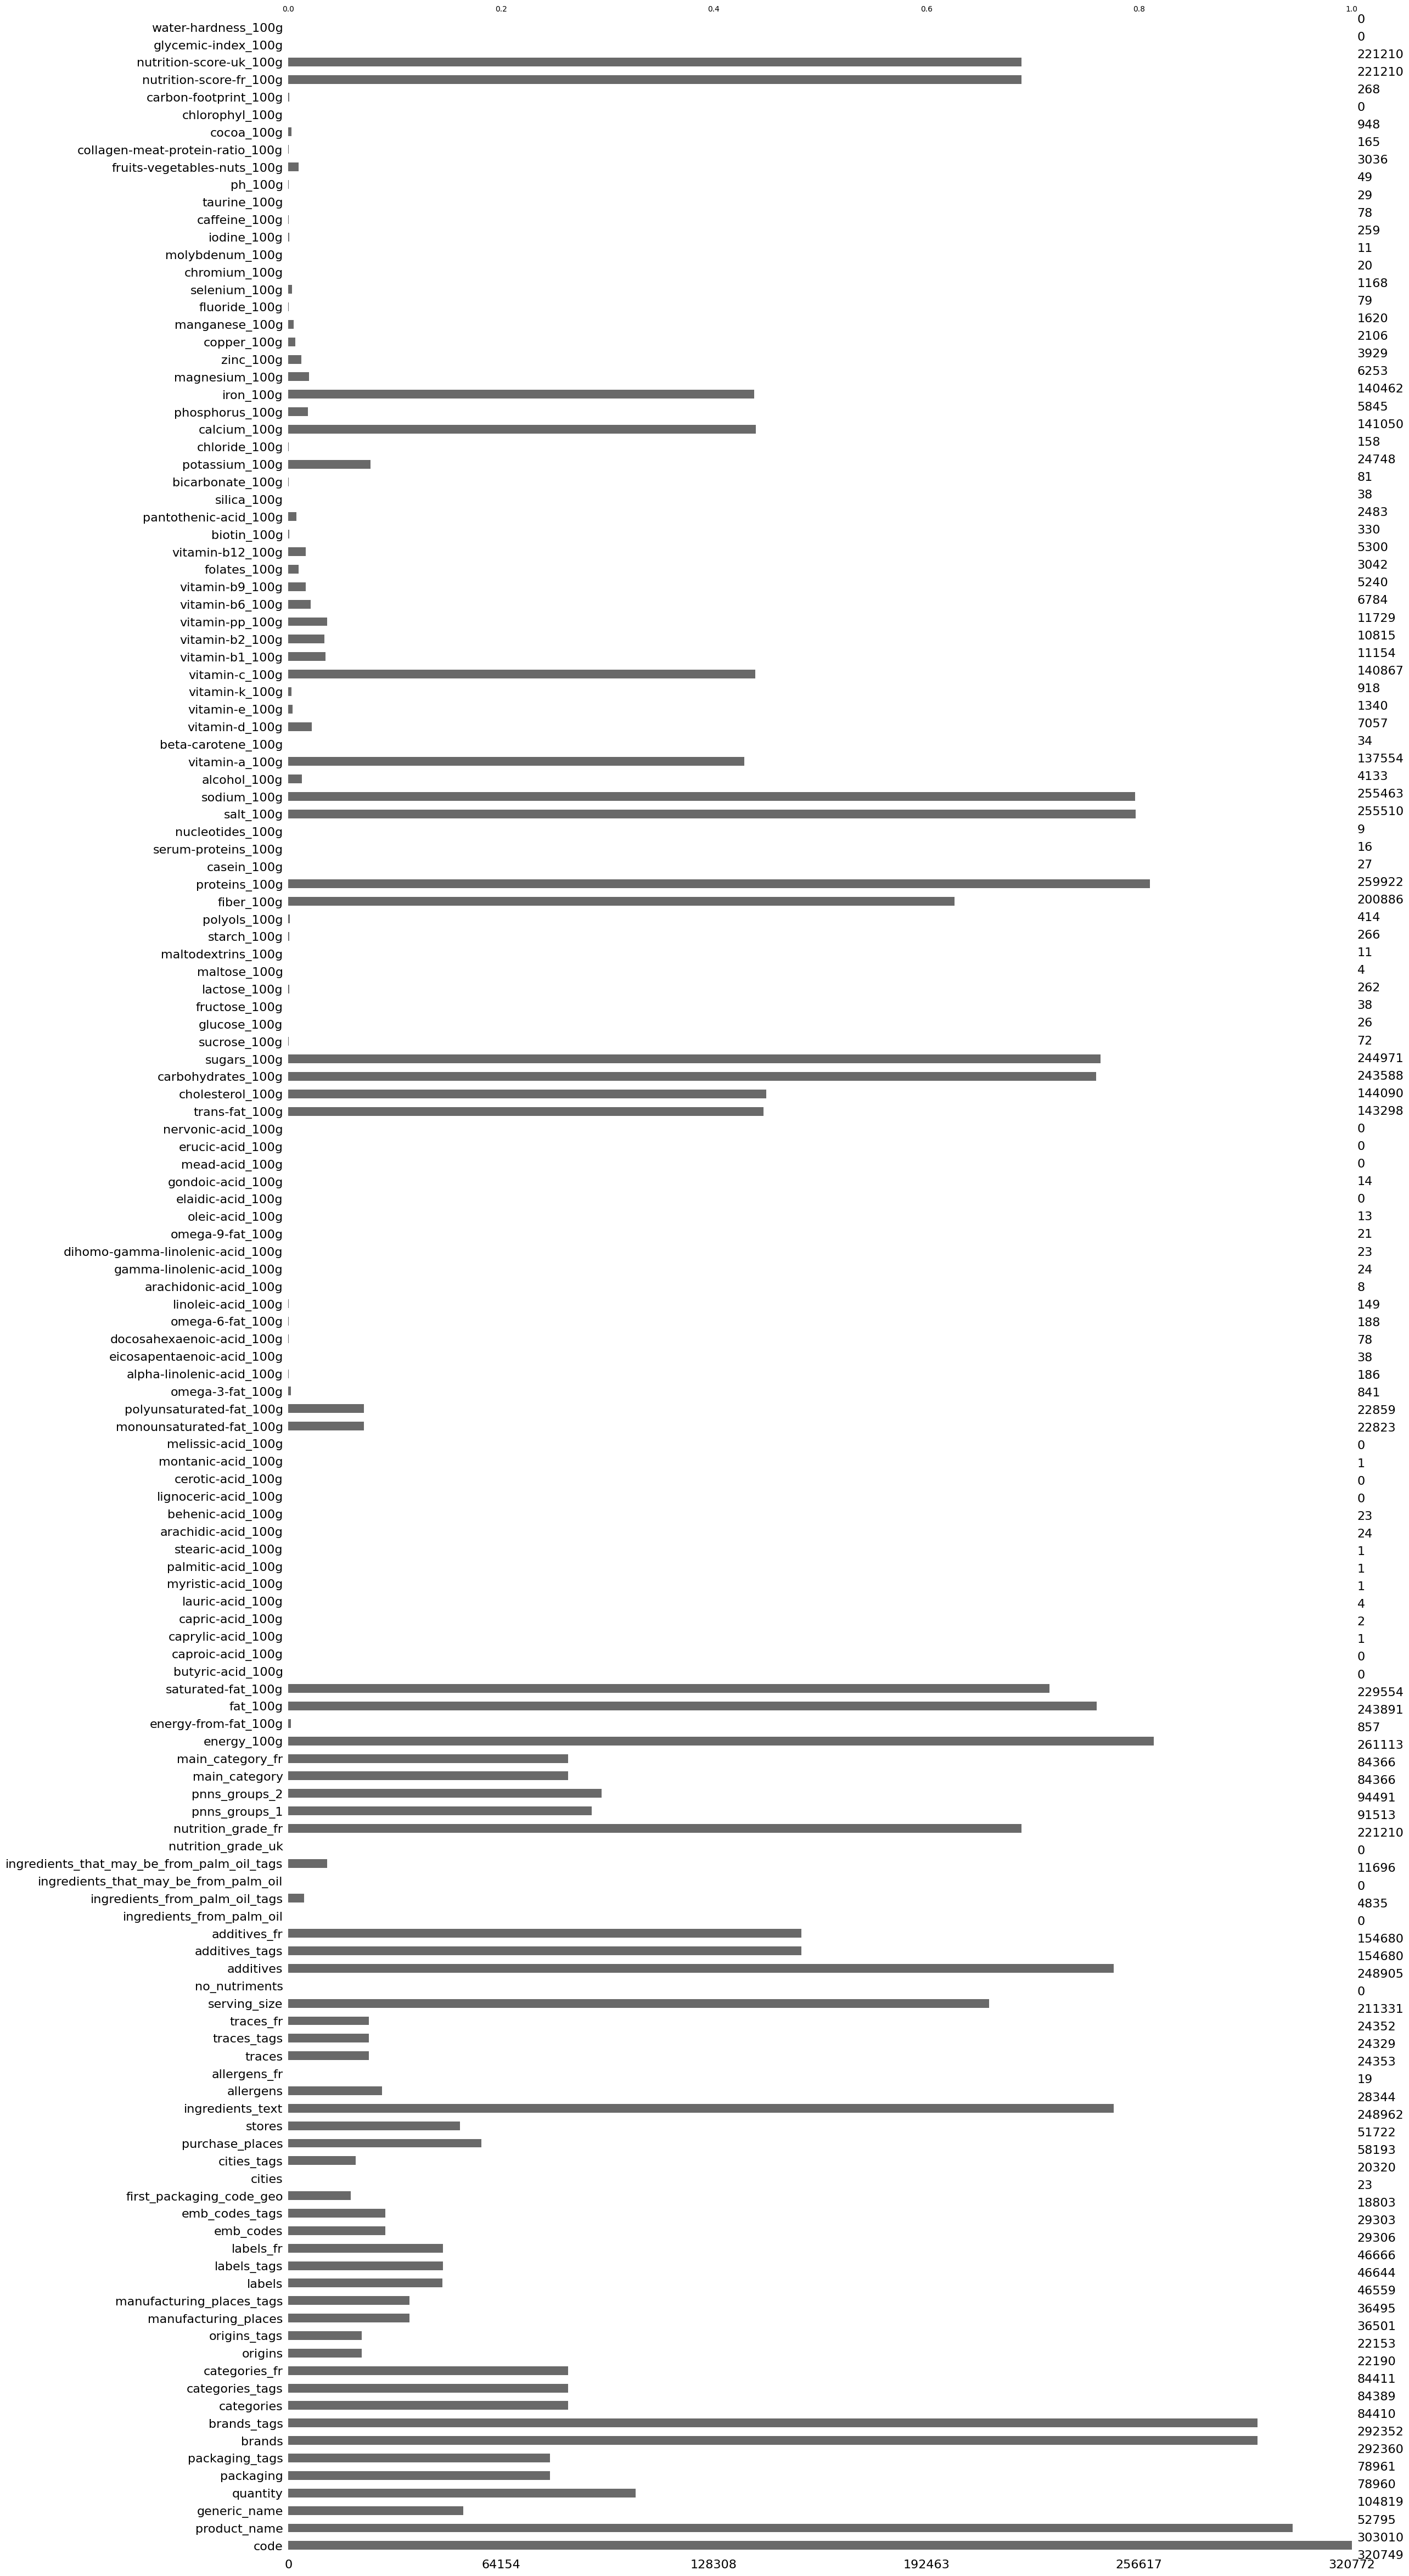

In [52]:
%matplotlib inline
msno.bar(df)

In [4]:

df.columns

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name',
       'generic_name', 'quantity',
       ...
       'ph_100g', 'fruits-vegetables-nuts_100g',
       'collagen-meat-protein-ratio_100g', 'cocoa_100g', 'chlorophyl_100g',
       'carbon-footprint_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g', 'glycemic-index_100g',
       'water-hardness_100g'],
      dtype='object', length=162)

In [5]:
df.drop(columns=['url', 'creator', 'created_t', 'created_datetime','last_modified_t', 'last_modified_datetime','countries','countries_tags','countries_fr','image_url','image_small_url','states','states_tags','states_fr'],inplace=True)
cols_to_drop = df.filter(regex='_n$').columns
df.drop(columns=cols_to_drop, inplace=True)
cols_to_drop = df.filter(regex='^state').columns

df.drop(columns=cols_to_drop, inplace=True)

<Axes: >

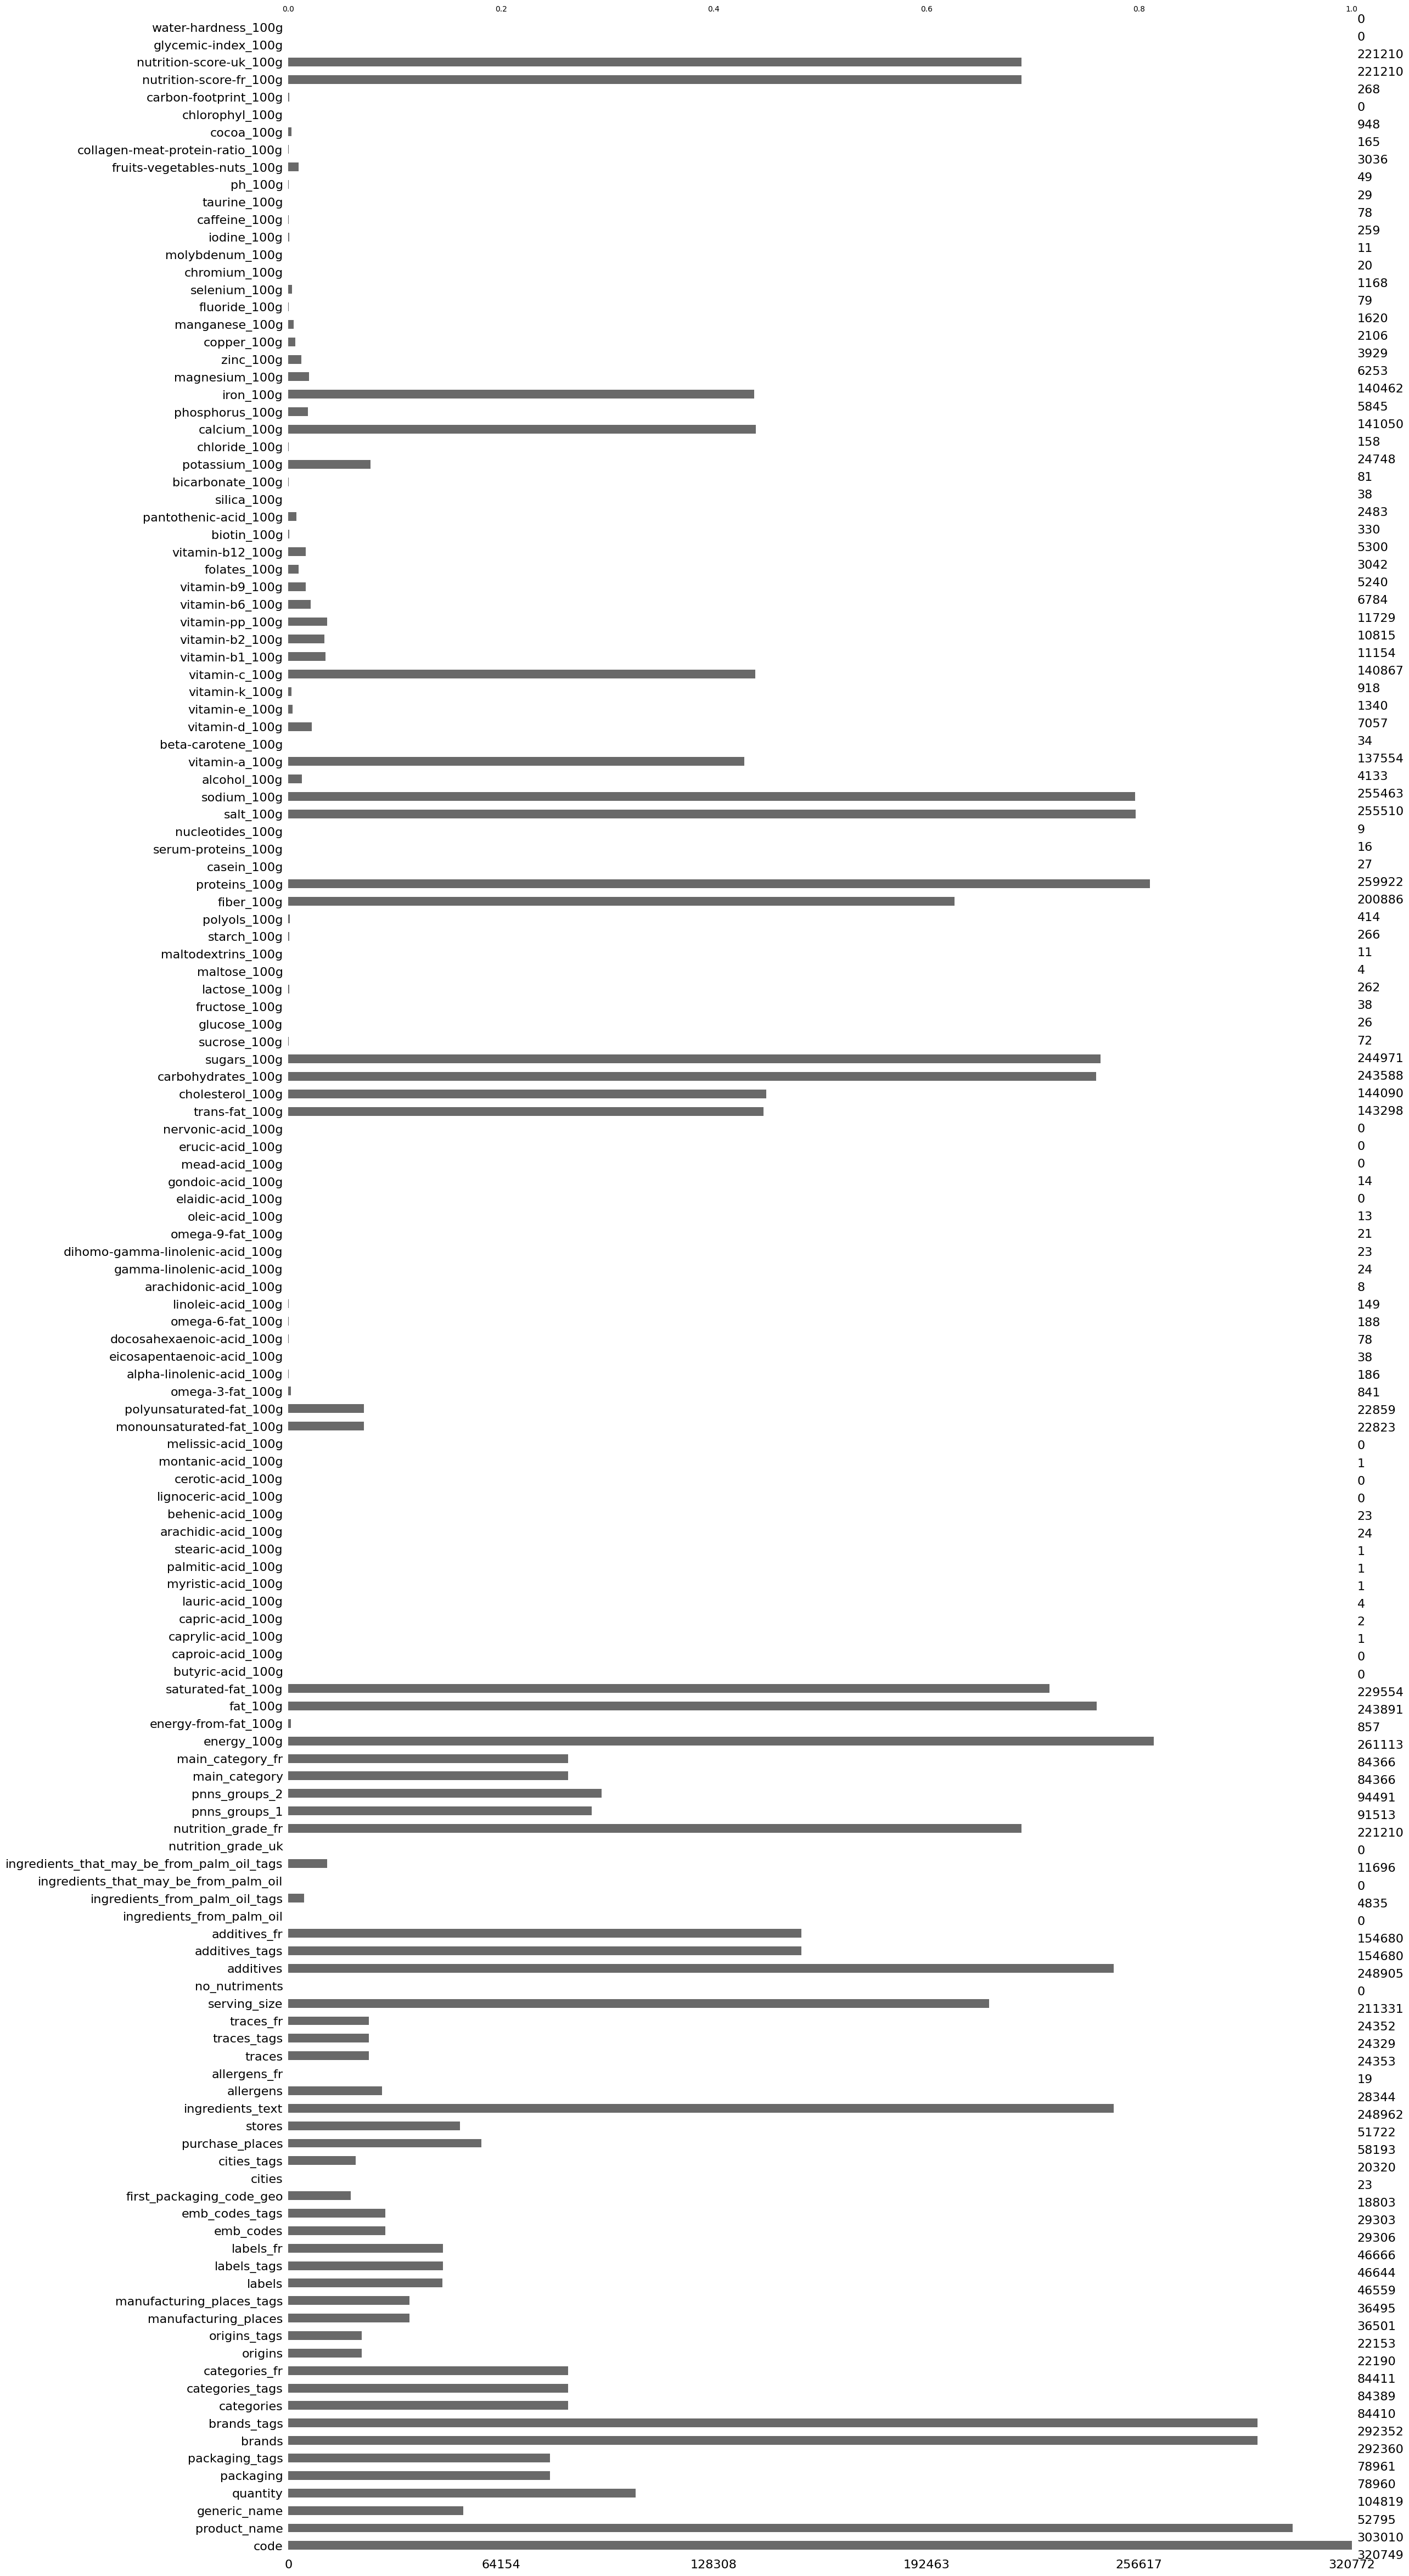

In [53]:
msno.bar(df)

In [55]:

# Calculer le nombre total de lignes
total_rows = len(df)

# Calculer le nombre de valeurs non nulles dans chaque colonne
non_null_counts = df.notna().sum()

# Calculer le taux de remplissage de chaque colonne
filling_rates = non_null_counts / total_rows * 100

# Filtrer les colonnes avec un taux de remplissage entre 20% et 50%
selected_columns = filling_rates[(filling_rates >= 5) ].index

# Conserver uniquement les colonnes sélectionnées
df_cleaned = df[selected_columns]
len(df_cleaned)

320772

<Axes: >

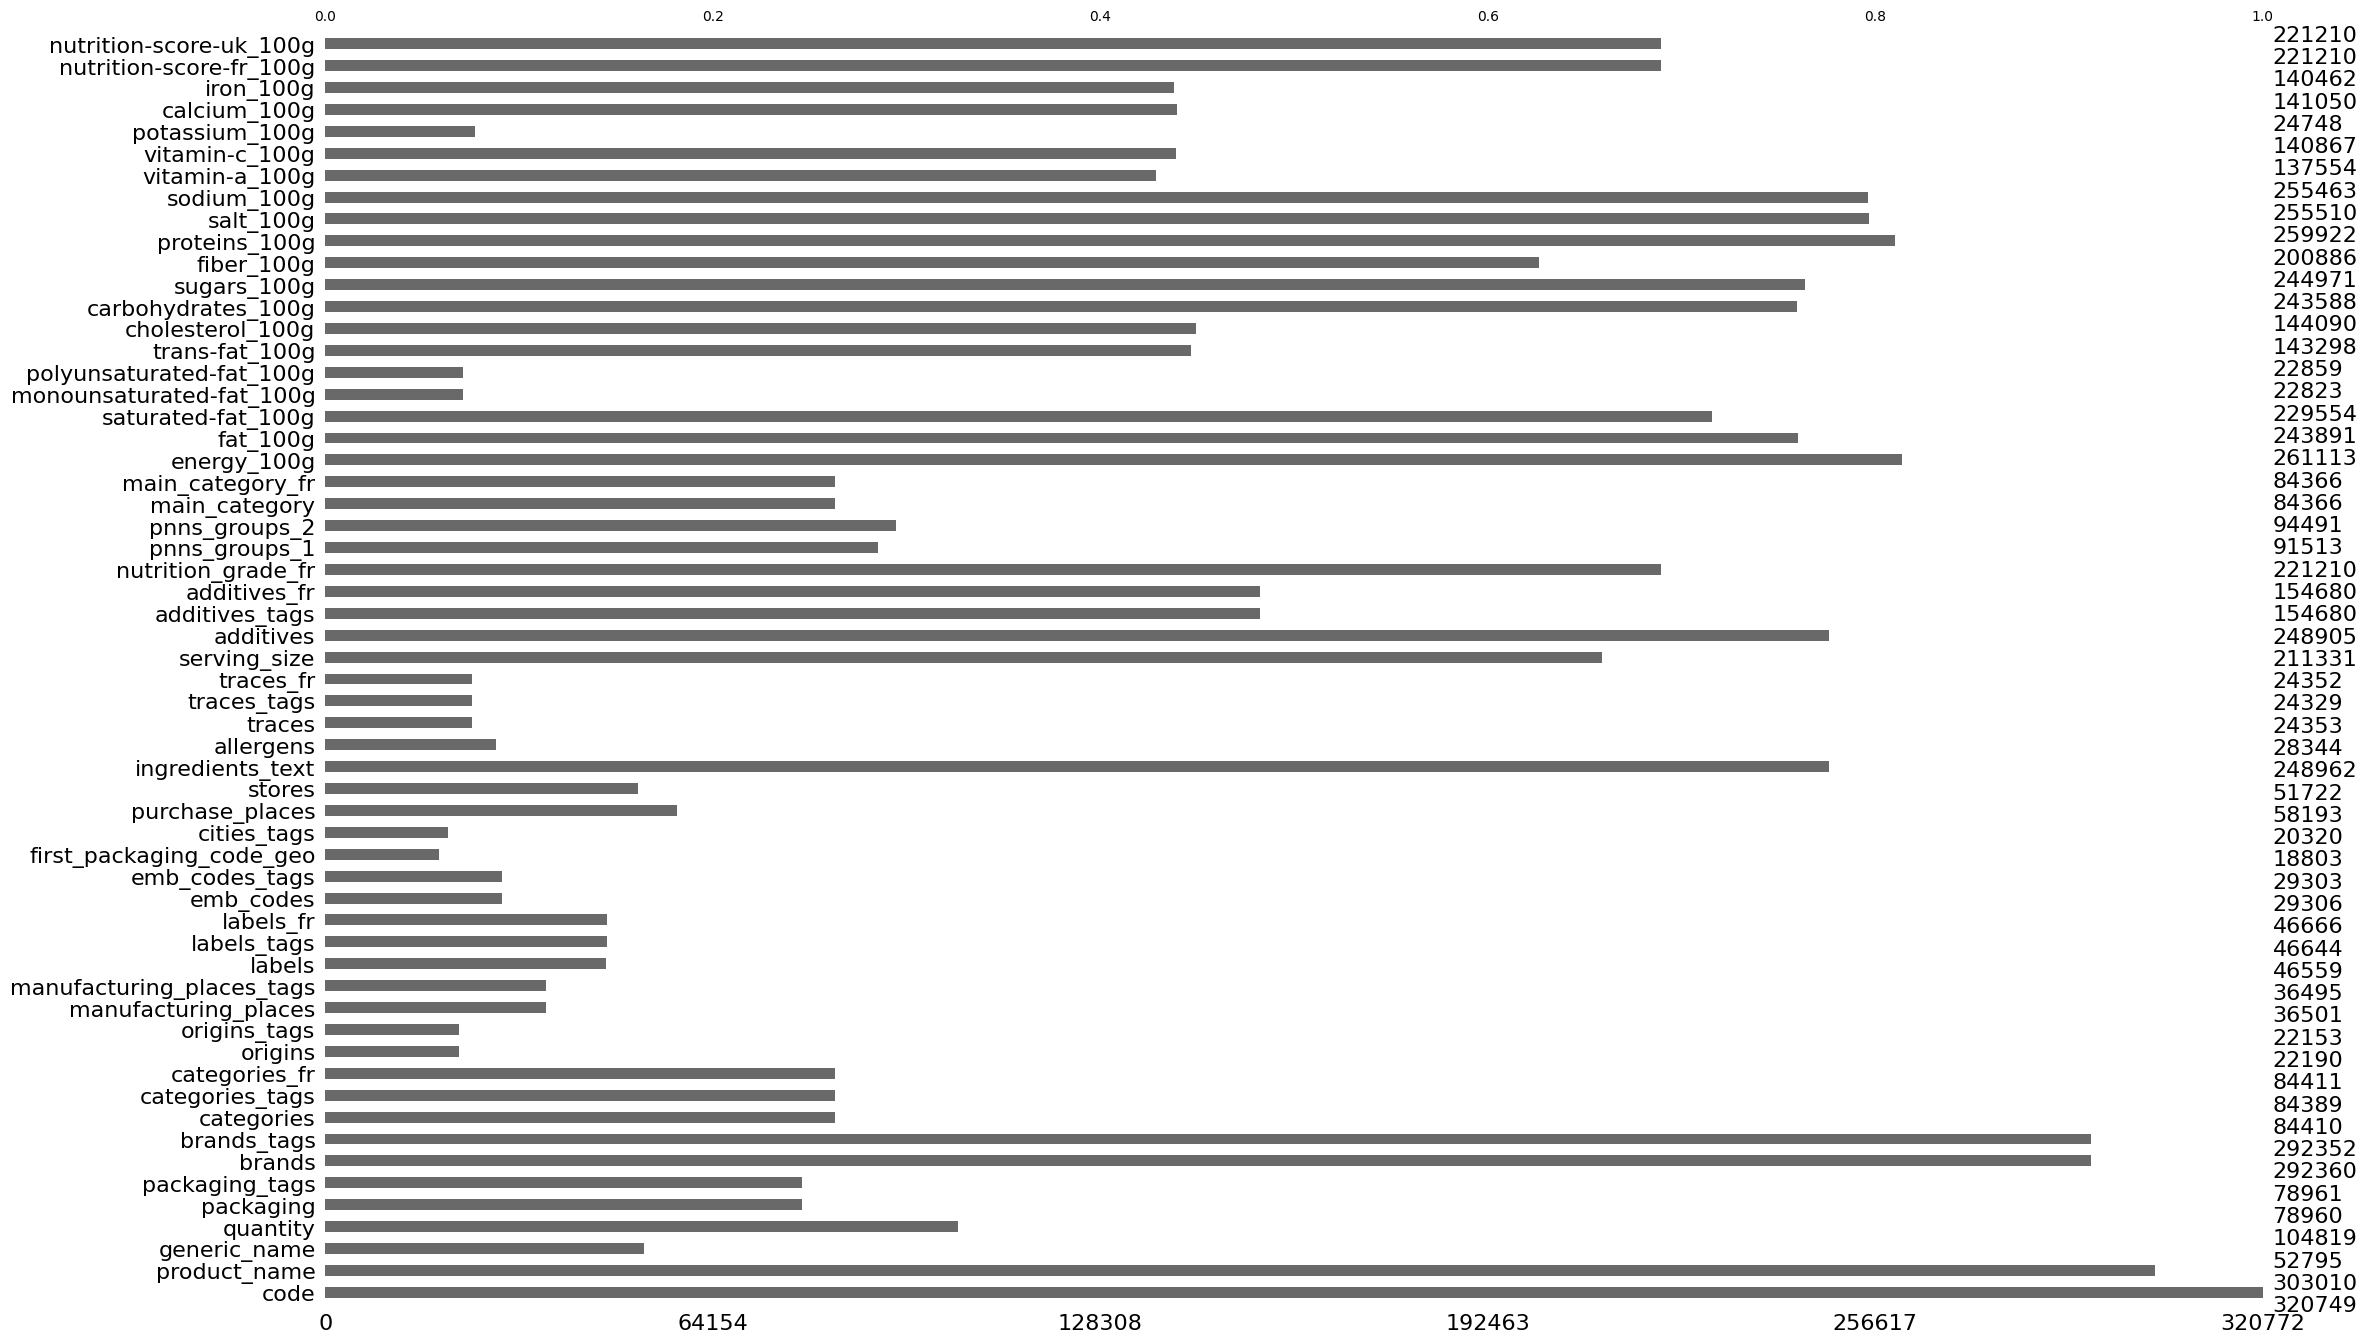

In [56]:
msno.bar(df_cleaned)

In [37]:
df_cleaned.drop_duplicates(subset=['code'])
len(df_cleaned)

320772

In [44]:
df_cible=df_cleaned.dropna(subset=['pnns_groups_1'])
df_cible_cleaned = df_cible[df_cible['pnns_groups_1']!= 'unknown']
len(df_cible)

91513

In [47]:
df_pnns1 = df_cible_cleaned['pnns_groups_1']
df_pnns1

174       Fruits and vegetables
175               Sugary snacks
177        Cereals and potatoes
180               Sugary snacks
182        Cereals and potatoes
                  ...          
320759    Fruits and vegetables
320763                Beverages
320765           Fish Meat Eggs
320766             Salty snacks
320769             Salty snacks
Name: pnns_groups_1, Length: 68889, dtype: object

In [49]:
counts = df_pnns1.value_counts().reset_index()
counts.columns = ['pnns_groups_1', 'Counts']
print(df_pnns1.value_counts())
# Créer le graphique avec Plotly
fig = px.bar(counts, x='pnns_groups_1', y='Counts', title='Value Counts de la variable pnns_groups_1')

# Afficher le graphique
fig.show()


pnns_groups_1
Sugary snacks              12368
Beverages                   9033
Milk and dairy products     8825
Cereals and potatoes        8442
Fish Meat Eggs              8041
Composite foods             6747
Fruits and vegetables       5908
Fat and sauces              5216
Salty snacks                2809
fruits-and-vegetables        987
sugary-snacks                496
cereals-and-potatoes          16
salty-snacks                   1
Name: count, dtype: int64


<Axes: >

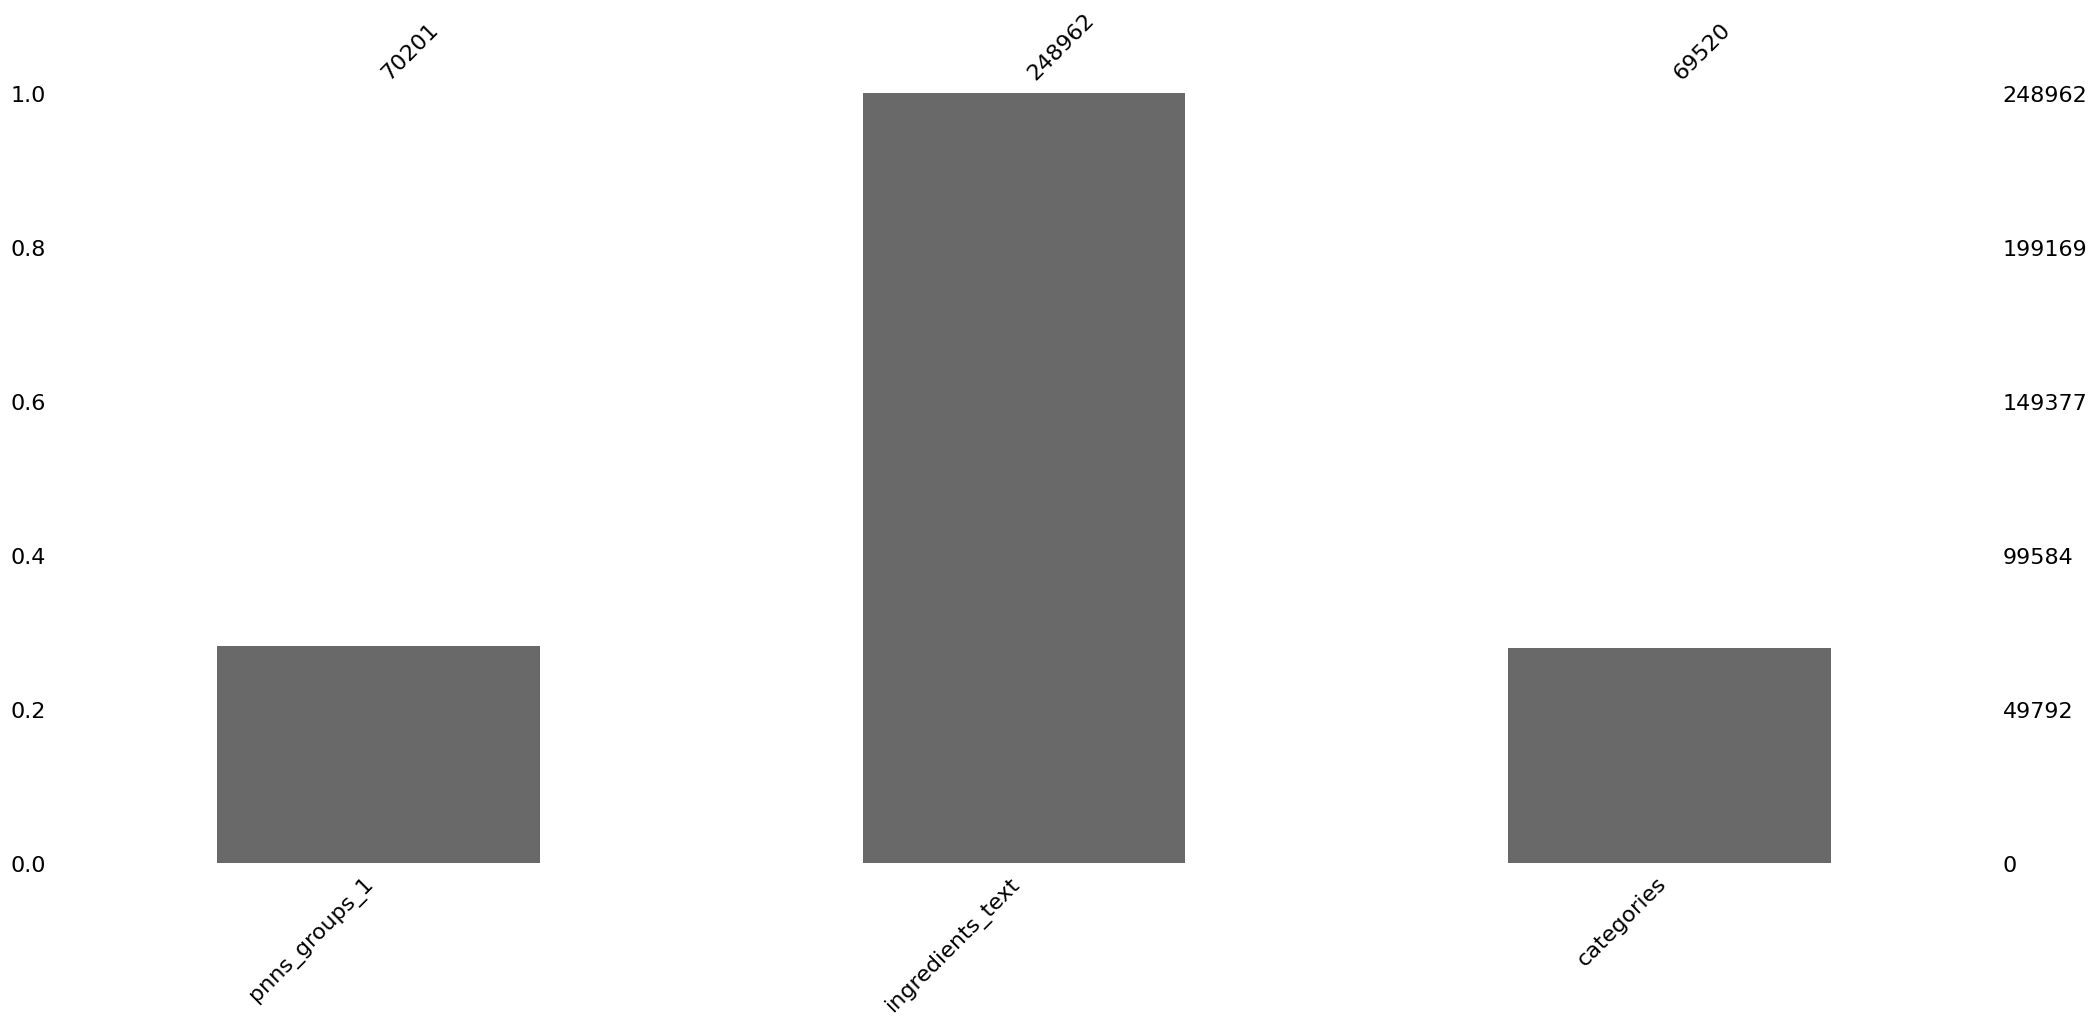

In [67]:
colonnes = ['pnns_groups_1','ingredients_text','categories']
df_select = df_travail.dropna(subset=['ingredients_text'])
df_travail = df_select[colonnes]
counts = df_travail['ingredients_text'].value_counts().reset_index()
counts.columns = ['ingredients_text', 'Counts']
#print(df_pnns1.value_counts())
# Créer le graphique avec Plotly
msno.bar(df_travail)
